1. Import thư viện cần thiết:

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

b. Load dữ liệu:

In [12]:
data = pd.read_csv('../../Dataset/shopping_behavior_updated.csv')

3. Kiểm tra một vài thông tin của dataset

In [13]:
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Head:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Payment Method Frequency 

3. Tiền xử lý dữ liệu:


In [14]:
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [15]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

4.1. Tạo cột AgeGroup

In [16]:
bins = [0, 18, 35, 60, 100] # Xác định bins cho tưng độ tuổi
labels = ['Youth', 'Adult', 'Middle-Aged', 'Senior'] # Đặt tên cho các nhóm
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

4.2. Tạo cột Season target từ Season

In [17]:
data['SeasonTarget'] = data['Season']

5. Kiểm tra ảnh hưởng của các đặc trưng đến Purchase Amount (USD):

In [18]:
# ANOVA cho AgeGroup
anova_age = f_oneway(
    data[data['AgeGroup'] == 'Adult']['Purchase Amount (USD)'],
    data[data['AgeGroup'] == 'Middle-Aged']['Purchase Amount (USD)'],
    data[data['AgeGroup'] == 'Senior']['Purchase Amount (USD)']
)
print(f"ANOVA for AgeGroup: F-statistic = {anova_age.statistic}, p-value = {anova_age.pvalue}")

# ANOVA cho Season
anova_season = f_oneway(
    data[data['Season'] == 'Spring']['Purchase Amount (USD)'],
    data[data['Season'] == 'Summer']['Purchase Amount (USD)'],
    data[data['Season'] == 'Fall']['Purchase Amount (USD)'],
    data[data['Season'] == 'Winter']['Purchase Amount (USD)']
)
print(f"ANOVA for Season: F-statistic = {anova_season.statistic}, p-value = {anova_season.pvalue}")

ANOVA for AgeGroup: F-statistic = 0.25811984467777843, p-value = 0.7725158524236588
ANOVA for Season: F-statistic = 3.746118346099816, p-value = 0.010576155629494032


Sử dụng boxplot để minh họa sự khác biệt giữa các nhóm:


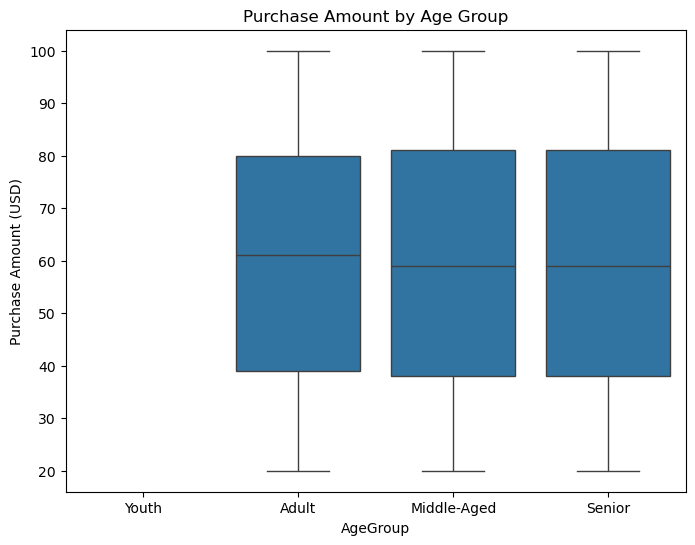

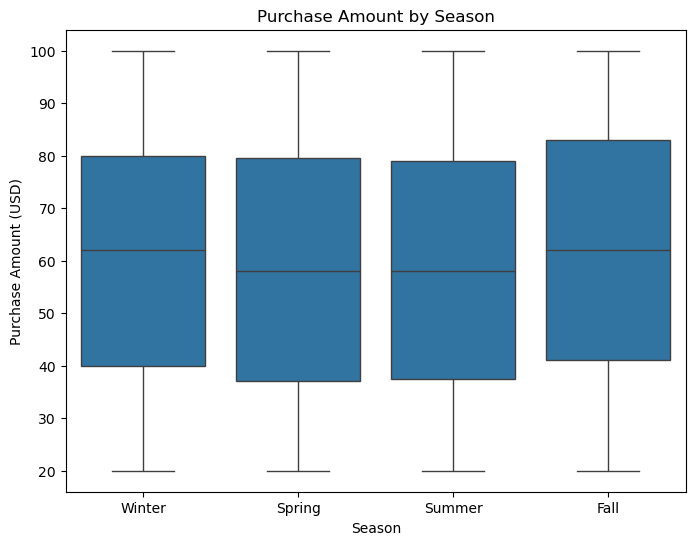

In [19]:
# Boxplot cho AgeGroup
plt.figure(figsize=(8, 6))
sns.boxplot(x='AgeGroup', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount by Age Group')
plt.show()

# Boxplot cho Season
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount by Season')
plt.show()

Phân tích giá trị p-value:
ANOVA cho AgeGroup:

F-statistic: 0.2581
p-value: 0.7725
Kết luận:
Giá trị p-value lớn hơn 0.05 (ngưỡng ý nghĩa thông thường), cho thấy không có sự khác biệt đáng kể về số tiền mua hàng (Purchase Amount (USD)) giữa các nhóm tuổi (Adult, Middle-Aged, Senior).
Điều này có nghĩa là nhóm tuổi không phải là yếu tố quan trọng ảnh hưởng đến số tiền mua hàng trong tập dữ liệu này.

Vì không có sự khác biệt đáng kể, doanh nghiệp có thể không cần phân khúc khách hàng theo nhóm tuổi khi phân tích số tiền mua hàng.
Tuy nhiên, có thể cần kiểm tra thêm các yếu tố khác như loại sản phẩm hoặc tần suất mua hàng để hiểu rõ hơn hành vi của từng nhóm tuổi.

ANOVA cho Season:

F-statistic: 3.7461
p-value: 0.0106
Kết luận:
Giá trị p-value nhỏ hơn 0.05, cho thấy có sự khác biệt đáng kể về số tiền mua hàng giữa các mùa (Spring, Summer, Fall, Winter).
Điều này có nghĩa là mùa có ảnh hưởng đáng kể đến số tiền mua hàng, và doanh nghiệp có thể tập trung vào các mùa cụ thể để tối ưu hóa doanh thu.

Vì mùa có ảnh hưởng đáng kể, doanh nghiệp nên tập trung vào các chiến lược kinh doanh theo mùa, chẳng hạn:
Tăng cường quảng cáo và khuyến mãi trong các mùa có mức chi tiêu cao.
Phân tích sâu hơn để xác định mùa nào có doanh thu cao nhất và tối ưu hóa hàng tồn kho.

Thực hiện kiểm tra hậu kiểm (post-hoc test) như Tukey's HSD để xác nhận sự khác biệt giữa các mùa là có ý nghĩa thống kê.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Fall Spring  -2.8192 0.0407 -5.5568 -0.0816   True
  Fall Summer  -3.1517 0.0182 -5.9202 -0.3831   True
  Fall Winter  -1.1996 0.6783 -3.9566  1.5575  False
Spring Summer  -0.3325 0.9896 -3.0846  2.4196  False
Spring Winter   1.6196 0.4261 -1.1208  4.3601  False
Summer Winter   1.9521 0.2685 -0.8193  4.7235  False
----------------------------------------------------


<Figure size 1000x600 with 0 Axes>

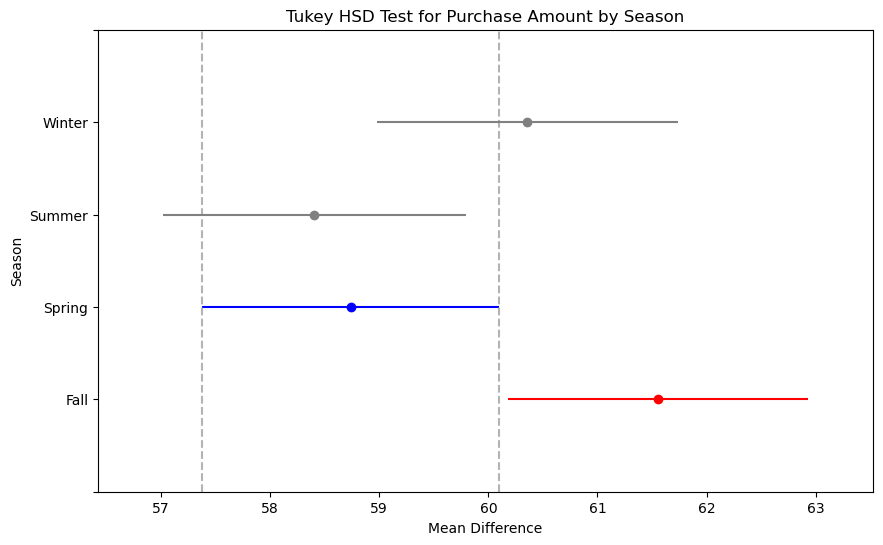

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Thực hiện Tukey's HSD
tukey = pairwise_tukeyhsd(endog=data['Purchase Amount (USD)'], groups=data['Season'], alpha=0.05)

# In kết quả
print(tukey)

# Trực quan hóa kết quả Tukey's HSD
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous(comparison_name='Spring', xlabel='Mean Difference', ylabel='Season')
plt.title('Tukey HSD Test for Purchase Amount by Season')
plt.show()

So sánh giữa các mùa:
Fall vs Spring:

Chênh lệch trung bình: -2.8192
p-value: 0.0407 (nhỏ hơn 0.05)
Kết luận: Có sự khác biệt đáng kể về doanh thu giữa mùa Fall và Spring. Mùa Fall có doanh thu cao hơn mùa Spring.
Fall vs Summer:

Chênh lệch trung bình: -3.1517
p-value: 0.0182 (nhỏ hơn 0.05)
Kết luận: Có sự khác biệt đáng kể về doanh thu giữa mùa Fall và Summer. Mùa Fall có doanh thu cao hơn mùa Summer.
Fall vs Winter:

Chênh lệch trung bình: -1.1996
p-value: 0.6783 (lớn hơn 0.05)
Kết luận: Không có sự khác biệt đáng kể về doanh thu giữa mùa Fall và Winter.
Spring vs Summer:

Chênh lệch trung bình: -0.3325
p-value: 0.9896 (lớn hơn 0.05)
Kết luận: Không có sự khác biệt đáng kể về doanh thu giữa mùa Spring và Summer.
Spring vs Winter:

Chênh lệch trung bình: 1.6196
p-value: 0.4261 (lớn hơn 0.05)
Kết luận: Không có sự khác biệt đáng kể về doanh thu giữa mùa Spring và Winter.
Summer vs Winter:

Chênh lệch trung bình: 1.9521
p-value: 0.2685 (lớn hơn 0.05)
Kết luận: Không có sự khác biệt đáng kể về doanh thu giữa mùa Summer và Winter.

Tóm tắt kết quả:
Mùa Fall có doanh thu cao hơn đáng kể so với mùa Spring và Summer.
Không có sự khác biệt đáng kể về doanh thu giữa các cặp mùa còn lại (Fall vs Winter, Spring vs Summer, Spring vs Winter, Summer vs Winter).

Ứng dụng thực tiễn:
Tập trung vào mùa Fall:
Doanh nghiệp nên tập trung vào các chiến lược kinh doanh trong mùa Fall, vì đây là mùa có doanh thu cao hơn so với Spring và Summer.
Khuyến mãi trong mùa Spring và Summer:
Để tăng doanh thu, doanh nghiệp có thể triển khai các chương trình khuyến mãi hoặc giảm giá trong mùa Spring và Summer, vì đây là các mùa có doanh thu thấp hơn so với Fall.